<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       917 non-null    float64
 4   Cholesterol     746 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 86.2+ KB
None


              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  917.000000   746.000000  918.000000  918.000000   
mean    53.510893  132.540894   244.635389    0.233115 

Text(0.5, 1.0, 'Correlation Between Features & Output')

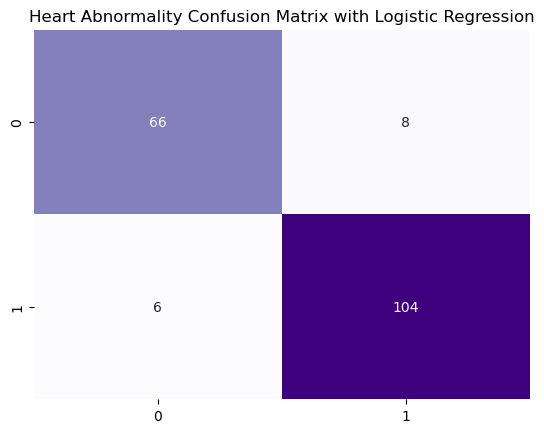

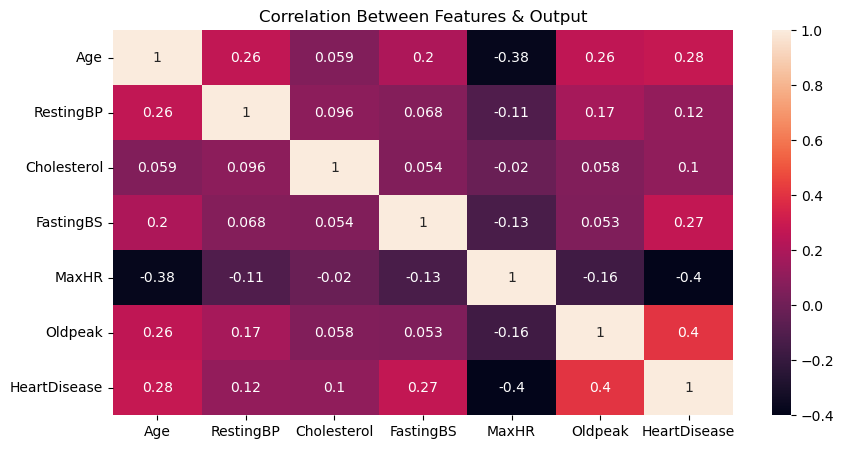

In [4]:
#Import required libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score

#We use these libraries from sources 5-14 as described on the report

# Import dataset
filePath = '/home/jupyter/eecs4404_project/heart.csv'
dataSet = pd.read_csv(filePath,  na_values={'RestingBP': 0, 'Cholesterol': 0})  #Read the data and set the values of RestingBP & Cholesterol that are 0 to N/A
#print(dataSet.info()) #Prints out info of dataset such as features and types
#print("\n")
#print(dataSet.describe()) #Prints out description of dataset
#print("\n")


# Rest of the preprocessing steps (imputation, encoding, scaling)

#Separate data into input and output
X = dataSet.iloc[:, : -1].values
Y = dataSet.iloc[:, -1].values

#Imputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
X[:, [3, 4]] = imputer.fit_transform(X[:, [3, 4]])

#Encoding
colTrans = ColumnTransformer(transformers = [('encoder', OneHotEncoder(drop = 'first'), [1,2,6,8,10])], remainder = 'passthrough')
X = np.array(colTrans.fit_transform(X))

#Separate data into sets for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1) #Loading Training Data into variables

#Standardize the data
secScalar = StandardScaler()
X_train[:, [9,10,11,13,14]] = secScalar.fit_transform(X_train[:, [9,10,11,13,14]])
X_test[:, [9,10,11,13,14]] = secScalar.transform(X_test[:, [9,10,11,13,14]])

#Training the algorithm

#Logistic Reg
LR = LogisticRegression()
LR.fit(X_train, y_train)

#SVM
svm = SVC(kernel = 'linear')
svm.fit(X_train, y_train)

#Using Algorithm Techniques to predict heart abnormality

#Logistic Reg
Y_predLog = LR.predict(X_test)
outputLog = confusion_matrix(y_test, Y_predLog)
LR_train_acc = round(accuracy_score(y_train, LR.predict(X_train))*100, 2) #Getting Accuracy scores from resulting predictions
LR_test_acc = round(accuracy_score(y_test, Y_predLog)*100, 2) #Getting Accuracy scores from resulting predictions

#SVM
Y_predSVM = svm.predict(X_test)
outputSVM = confusion_matrix(y_test, Y_predSVM)
svm_train_acc = round(accuracy_score(y_train, svm.predict(X_train))*100, 2)
svm_test_acc = round(accuracy_score(y_test, Y_predSVM)*100, 2)

#Outputting Results

#Logistic Regression
print('The Accuracy with LR is: ', LR_test_acc, '%')
sns.heatmap(outputLog, annot = True, fmt = 'd', cmap = 'Purples', cbar = False)
plt.title("Heart Abnormality Confusion Matrix with Logistic Regression");




#Correlation Matrix
plt.figure(figsize = (10,5))
sns.heatmap(dataSet.select_dtypes('number').corr(), annot = True)
plt.title('Correlation Between Features & Output')


In [2]:
import os
os.getcwd()

'/home/jupyter/eecs4404_project'

The accuracy with SVM is:  90.76 %


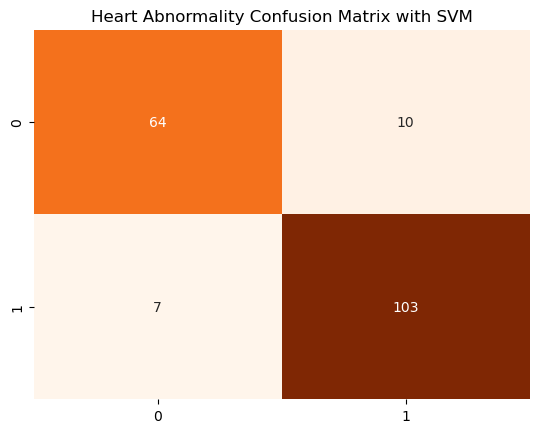

In [3]:
#Outputting Results
#SVM
print('The accuracy with SVM is: ', svm_test_acc, '%')
sns.heatmap(outputSVM, annot = True, fmt = 'd', cmap = 'Oranges', cbar = False)
plt.title("Heart Abnormality Confusion Matrix with SVM");

In [5]:
print(Y_predLog);

[1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1
 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1
 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1]
